# Finally some data insights . . . but after showing cleaning in R
This post is made possible by the inspiration of my brother, Nick, my partner, Kelly (who tolerates listening to me talk about data), my friend in learning, CJ, and a man of too many ideas, [Adam Peel][1]. They have all been awesome about reading my lengthy emails about myself and what I want to do. Adam has been great for taking my data and running preliminary models on it, showing me some things in R and Python, and just generally helping me think more about how to move forward with the actual analysis.
[1]: https://datajargon.com/

In [1]:
# Needed libraries
library(RCurl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(modelr)
thunder <- c("dodgerblue", "dodgerblue2", "dodgerblue3", "dodgerblue4", "darkorange4", "darkorange3", "darkorange2", "darkorange")

Loading required package: bitops

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:RCurl’:

    complete



## Cleaning in R
Despite having already cleaned up the dataset in Python in my last post, I thought I would repeat the process here to show it in R, so I will be using the older datset with the unnecessary repeats to be dealt with.

In [2]:
# Loading the dataset in R using 'getURL' from RCurl
x <- getURL("https://raw.githubusercontent.com/rvino/blog_data/master/NBA_Data/1976_to_2015_Draftees.csv")
df <- read.csv(text = x)
head(df)

X,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,⋯,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure
0,Tim Duncan,15,15,1997,1,SAS,Wake Forest University,19,1392,⋯,34.0,19.0,10.8,3.0,206.4,0.209,5.5,89.3,Gregg Popovich,2953 days 00:00:00.000000000
1,Kobe Bryant,15,18,1996,13,NOH,0,20,1346,⋯,36.1,25.0,5.2,4.7,172.7,0.170,3.9,72.1,Bob Bass,3292 days 00:00:00.000000000
2,Tony Delk,0,0,1996,16,NOH,University of Kentucky,10,545,⋯,21.5,9.1,2.5,1.9,19.5,0.080,-1.3,2.1,Bob Bass,3292 days 00:00:00.000000000
3,Malik Rose,0,0,1996,44,NOH,Drexel University,13,813,⋯,16.5,6.2,4.1,0.8,26.5,0.095,-1.4,1.9,Bob Bass,3292 days 00:00:00.000000000
4,Shaquille O'Neal,14,15,1992,1,ORL,Louisiana State University,19,1207,⋯,34.7,23.7,10.9,2.5,181.7,0.208,5.0,74.0,Pat Williams,3406 days 00:00:00.000000000
5,Karl Malone,14,14,1985,13,UTA,Louisiana Tech University,19,1476,⋯,37.2,25.0,10.1,3.6,234.6,0.205,5.4,102.5,Frank Layden,2959 days 00:00:00.000000000


From the previous merge, there is unneeded extra executive and tenure columns that I can drop. Since R is storing the datasets locally, it seems like a good practice to limit the size of the dataset as much as possible. 

In [3]:
# Drop unneeded columns, pretty easy with dplyr's select
df <- select(df, Player:Tenure)
head(df)

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure
Tim Duncan,15,15,1997,1,SAS,Wake Forest University,19,1392,47368,⋯,34.0,19.0,10.8,3.0,206.4,0.209,5.5,89.3,Gregg Popovich,2953 days 00:00:00.000000000
Kobe Bryant,15,18,1996,13,NOH,0,20,1346,48637,⋯,36.1,25.0,5.2,4.7,172.7,0.170,3.9,72.1,Bob Bass,3292 days 00:00:00.000000000
Tony Delk,0,0,1996,16,NOH,University of Kentucky,10,545,11702,⋯,21.5,9.1,2.5,1.9,19.5,0.080,-1.3,2.1,Bob Bass,3292 days 00:00:00.000000000
Malik Rose,0,0,1996,44,NOH,Drexel University,13,813,13404,⋯,16.5,6.2,4.1,0.8,26.5,0.095,-1.4,1.9,Bob Bass,3292 days 00:00:00.000000000
Shaquille O'Neal,14,15,1992,1,ORL,Louisiana State University,19,1207,41918,⋯,34.7,23.7,10.9,2.5,181.7,0.208,5.0,74.0,Pat Williams,3406 days 00:00:00.000000000
Karl Malone,14,14,1985,13,UTA,Louisiana Tech University,19,1476,54852,⋯,37.2,25.0,10.1,3.6,234.6,0.205,5.4,102.5,Frank Layden,2959 days 00:00:00.000000000


In [4]:
# Check for missing values, this is pretty easy to just check the entire data set, but can also be run on just a column
sum(is.na(df))

[1] 0

In [5]:
glimpse(df)

Observations: 3,985
Variables: 26
$ Player           <fctr> Tim Duncan, Kobe Bryant, Tony Delk, Malik Rose, S...
$ All_NBA          <dbl> 15, 15, 0, 0, 14, 14, 0, 0, 0, 0, 0, 12, 0, 0, 0, ...
$ All.Star         <dbl> 15, 18, 0, 0, 15, 14, 0, 0, 0, 0, 0, 12, 0, 0, 0, ...
$ Draft_Yr         <dbl> 1997, 1996, 1996, 1996, 1992, 1985, 1985, 1985, 19...
$ Pk               <dbl> 1, 13, 16, 44, 1, 13, 37, 83, 105, 129, 151, 1, 51...
$ Team             <fctr> SAS, NOH, NOH, NOH, ORL, UTA, UTA, UTA, UTA, UTA,...
$ College          <fctr> Wake Forest University, 0, University of Kentucky...
$ Yrs              <dbl> 19, 20, 10, 13, 19, 19, 3, 4, 0, 0, 0, 18, 8, 0, 0...
$ Games            <dbl> 1392, 1346, 545, 813, 1207, 1476, 180, 239, 0, 0, ...
$ Minutes.Played   <dbl> 47368, 48637, 11702, 13404, 41918, 54852, 2376, 23...
$ PTS              <dbl> 26496, 33643, 4957, 5003, 28596, 36928, 847, 816, ...
$ TRB              <dbl> 15091, 7047, 1351, 3371, 13099, 14968, 524, 184, 0...
$ AST             

In [6]:
# Check for duplicates & deal with
dupl_t1 <- df[duplicated(df[c(1,7:9)]),] # This checks for duplicates in the Player, College, Yrs, Games columns and returns the 'Type 1' duplicates 
head(dupl_t1)

,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure
657,Ron Norwood,0,0,1976,47,PHI,DePaul University,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Pat Williams,4335 days 00:00:00.000000000
692,Ralph Drollinger,0,0,1976,121,BOS,"University of California, Los Angeles",1,6,67,⋯,11.2,2.5,3.2,2.3,-0.2,-0.117,-6.4,-0.1,Red Auerbach,12493 days 00:00:00.000000000
722,Lars Hansen,0,0,1977,151,LAL,University of Washington,1,15,205,⋯,13.7,5.1,3.9,0.9,0.6,0.149,-1.1,0.0,Bill Sharman,2106 days 00:00:00.000000000
763,Phil Walker,0,0,1977,39,WAS,Millersville University of Pennsylvania,1,40,384,⋯,9.6,4.5,1.3,1.4,-0.4,-0.045,-6.0,-0.4,Bob Ferry,6208 days 00:00:00.000000000
764,Bruce Parkinson,0,0,1977,105,WAS,Purdue University,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Bob Ferry,6208 days 00:00:00.000000000
773,Ralph Drollinger,0,0,1978,105,OKC,"University of California, Los Angeles",1,6,67,⋯,11.2,2.5,3.2,2.3,-0.2,-0.117,-6.4,-0.1,Zollie Volchok,2189 days 00:00:00.000000000


From the above head of the duplicate dataframe we can see that we are getting the same 'Type 1' duplicate players that we found in the previous post using Python. Since these duplicates are those that we want the later entry for, we can grab them using arrange and dplyr's distinct function. Looking at the glimpse output below you can see that 24 entries were dropped which matches what we did in Python

In [7]:
# Getting rid of duplicates of the same player and keeping the later entry
df <- df %>%
  arrange(desc(Draft_Yr)) %>% # arranging the df to put the later year first
  distinct(Player, College, Yrs, Games, .keep_all = TRUE) # now keeping player's with distinct entries for the enumerated columns
glimpse(df)

Observations: 3,961
Variables: 26
$ Player           <fctr> Marcus Thornton, Terry Rozier, R.J. Hunter, Jorda...
$ All_NBA          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ All.Star         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Draft_Yr         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 20...
$ Pk               <dbl> 45, 16, 28, 33, 1, 31, 36, 2, 27, 34, 3, 35, 37, 4...
$ Team             <fctr> BOS, BOS, BOS, BOS, MIN, MIN, MIN, LAL, LAL, LAL,...
$ College          <fctr> College of William & Mary, University of Louisvil...
$ Yrs              <dbl> 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,...
$ Games            <dbl> 0, 39, 36, 16, 82, 0, 1, 80, 63, 29, 53, 0, 51, 0,...
$ Minutes.Played   <dbl> 0, 311, 315, 57, 2627, 0, 6, 2259, 1266, 599, 1591...
$ PTS              <dbl> 0, 72, 97, 21, 1503, 0, 4, 1054, 349, 115, 928, 0,...
$ TRB              <dbl> 0, 63, 37, 13, 857, 0, 1, 274, 312, 70, 373, 0, 13...
$ AST             

Now to deal with 'Type 2' duplicates, i.e. players with the same name. As shown before, I'll make the actual adjustments to the four players where the merge screwed up their NBA accomplishment data, but I just want to show how to find them. The issue with using distinct and unique is that they are used to drop rows, hopefully [Hadley][1] expands the arguments in distinct to allow for simple things like taking the last repeat, or creating a dataframe of all duplicated entries.
[1]: https://github.com/hadley/dplyr/blob/master/man/distinct.Rd

In [8]:
dupl_t2 <- df[duplicated(df[c(1)]),] # This checks for duplicates in just the Player column
head(dupl_t2, 10)

,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure
418,Marcus Thornton,0,0,2009,43,MIA,Louisiana State University,7,450,10724,⋯,23.8,12.3,2.8,1.4,19.5,0.087,-0.7,3.6,Pat Riley,2923 days 00:00:00.000000000
585,Marcus Williams,0,0,2006,22,NJN,University of Connecticut,4,203,3095,⋯,15.2,5.6,1.8,2.8,0.0,-0.001,-4.6,-2.0,Ed Stefanski,1253 days 00:00:00.000000000
1065,Corey Brewer,0,0,1998,51,MIA,University of Oklahoma,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Randy Pfund,4333 days 00:00:00.000000000
1489,Dee Brown,0,0,1990,19,BOS,Jacksonville University,12,608,16843,⋯,27.7,11.1,2.6,3.7,33.4,0.095,0.6,11.0,Dave Gavitt,1476 days 00:00:00.000000000
1509,Tim Hardaway,5,5,1989,14,GSW,University of Texas at El Paso,13,867,30626,⋯,35.3,17.7,3.3,8.2,85.0,0.133,2.5,34.6,Don Nelson,2601 days 00:00:00.000000000
1512,Glen Rice,2,3,1989,4,MIA,University of Michigan,15,1000,34985,⋯,35.0,18.3,4.4,2.1,88.7,0.122,0.5,22.1,Lewis Schaffel,2966 days 00:00:00.000000000
1543,Michael Smith,0,0,1989,13,BOS,Brigham Young University,3,141,1328,⋯,9.4,5.0,1.5,1.0,1.4,0.049,-4.1,-0.7,Jan Volk,2150 days 00:00:00.000000000
1579,Charles Smith,0,0,1988,3,PHI,University of Pittsburgh,9,564,16378,⋯,29.0,14.4,5.8,1.4,40.9,0.120,0.2,9.3,John Nash,1449 days 00:00:00.000000000
1805,Greg Anderson,0,0,1986,131,DAL,Lamar University,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Norm Sonju,5859 days 00:00:00.000000000
1811,Greg Grant,0,0,1986,132,DET,Utah State University,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Jack McCloskey,4556 days 00:00:00.000000000


I'm now going to load up the adjusted dataframe that has the Type 2 duplicates dealt with for the rest of this project.

In [9]:
x <- getURL("https://raw.githubusercontent.com/rvino/blog_data/master/NBA_Data/1976_to_2015_Draftees_edit.csv")
df <- read.csv(text = x)
df <- select(df, Player:Tenure) # dropping the exec_id, attend_college, and exec_draft_exp columns to show how to build these in R
head(df)

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure
Chris Mullin,4,5,1985,7,GSW,St. John's University,16,986,32163,⋯,32.6,18.2,4.1,3.5,93.1,0.139,2.8,38.7,Al Attles,3641 days 00:00:00.000000000
Brad Wright,0,0,1985,49,GSW,"University of California, Los Angeles",2,16,145,⋯,9.1,3.4,3.4,0.1,-0.1,-0.045,-10.3,-0.3,Al Attles,3641 days 00:00:00.000000000
Luster Goodwin,0,0,1985,71,GSW,University of Texas at El Paso,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000
Greg Cavener,0,0,1985,95,GSW,University of Missouri,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000
Gerald Crosby,0,0,1985,117,GSW,University of Georgia,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000
Eric Boyd,0,0,1985,141,GSW,North Carolina Agricultural and Technical State University,0,0,0,⋯,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000


I'm going to create four new columns below that should help with analysis. Adam already created some of these for his first look at the data and sent me his code which I'm including at the bottom of this post. My personal instinct was to do it a little differently, so I'm going to show my method here.
The 'fourth' column I'm going to add is actually 5 dummy variables for if a player is within 5 years of having been drafted.

In [10]:
# 4. Add new columns, exec_id, exec draft experience, attend college, and years out from draft
# First exec_id
library(data.table)
df <- data.table(df, key="Executive")
df <- df[, Exec_ID:=.GRP, by=key(df)]
tail(df)

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, last



Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID
John Greig,0,0,1982,65,OKC,University of Oregon,1,9,26,⋯,2.1,0.7,0,0.1,0.182,-9.5,0,Zollie Volchok,2189 days 00:00:00.000000000,162
Ken Owens,0,0,1982,88,OKC,University of Idaho,0,0,0,⋯,0.0,0.0,0,0.0,0.000,0.0,0,Zollie Volchok,2189 days 00:00:00.000000000,162
Rod Camp,0,0,1982,111,OKC,Southern Illinois University,0,0,0,⋯,0.0,0.0,0,0.0,0.000,0.0,0,Zollie Volchok,2189 days 00:00:00.000000000,162
Bobby Potts,0,0,1982,134,OKC,University of North Carolina at Charlotte,0,0,0,⋯,0.0,0.0,0,0.0,0.000,0.0,0,Zollie Volchok,2189 days 00:00:00.000000000,162
Allen Rayhorn,0,0,1982,157,OKC,Northern Illinois University,0,0,0,⋯,0.0,0.0,0,0.0,0.000,0.0,0,Zollie Volchok,2189 days 00:00:00.000000000,162
Steve Burks,0,0,1982,180,OKC,University of Washington,0,0,0,⋯,0.0,0.0,0,0.0,0.000,0.0,0,Zollie Volchok,2189 days 00:00:00.000000000,162


So the last exec got the id of 162, but do I know if I have 162 unique executives? Luckily I can check this very quickly to see how many unique values there are for Executive and to make sure I have the proper number of id values.

In [11]:
length(unique(df$Executive))

[1] 162

In [12]:
# Getting the Exec draft experience column, curtesy of stack overflow
df <- df %>% 
   arrange(Executive, Draft_Yr) %>% 
   group_by(Executive) %>%
   mutate(Exec_draft_exp = match(Draft_Yr, unique(Draft_Yr))) %>%
   ungroup()
df[which(df$Executive == "Sam Presti"), ]

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp
Kevin Durant,6,7,2007,2,OKC,University of Texas at Austin,9,641,24208,⋯,7.0,3.7,107.9,0.214,4.8,41.7,Sam Presti,3403 days 00:00:00.000000000,145,1
Carl Landry,0,0,2007,31,OKC,Purdue University,9,513,11524,⋯,4.9,0.7,35.9,0.149,-1.1,2.6,Sam Presti,3403 days 00:00:00.000000000,145,1
Glen Davis,0,0,2007,35,OKC,Louisiana State University,8,514,10865,⋯,4.4,0.9,18.6,0.082,-2.3,-0.8,Sam Presti,3403 days 00:00:00.000000000,145,1
Russell Westbrook,5,5,2008,4,OKC,"University of California, Los Angeles",8,587,19984,⋯,5.6,7.6,67.0,0.161,5.2,36.1,Sam Presti,3403 days 00:00:00.000000000,145,2
Serge Ibaka,0,0,2008,24,OKC,0,7,524,15099,⋯,7.4,0.6,47.6,0.151,0.9,11.1,Sam Presti,3403 days 00:00:00.000000000,145,2
Walter Sharpe,0,0,2008,32,OKC,University of Alabama at Birmingham,1,8,20,⋯,0.4,0.0,-0.1,-0.131,-16.5,-0.1,Sam Presti,3403 days 00:00:00.000000000,145,2
Trent Plaisted,0,0,2008,46,OKC,Brigham Young University Hawaii,0,0,0,⋯,0.0,0.0,0.0,0.000,0.0,0.0,Sam Presti,3403 days 00:00:00.000000000,145,2
DeVon Hardin,0,0,2008,50,OKC,University of California,0,0,0,⋯,0.0,0.0,0.0,0.000,0.0,0.0,Sam Presti,3403 days 00:00:00.000000000,145,2
Sasha Kaun,0,0,2008,56,OKC,University of Kansas,1,25,95,⋯,1.0,0.1,0.2,0.096,-0.8,0.0,Sam Presti,3403 days 00:00:00.000000000,145,2
James Harden,3,4,2009,3,OKC,Arizona State University,7,534,17741,⋯,4.6,4.9,76.3,0.206,5.3,32.6,Sam Presti,3403 days 00:00:00.000000000,145,3


In [13]:
# Now a dummy variable for attending college
df$attend_college <- factor(with(df, ifelse((College == "0"), 0, 1)))
df[which(df$Player == "Kobe Bryant"), ]
df[which(df$Player == "Paul Pierce"), ]

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college
Kobe Bryant,15,18,1996,13,NOH,0,20,1346,48637,⋯,4.7,172.7,0.17,3.9,72.1,Bob Bass,3292 days 00:00:00.000000000,13,16,0


Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college
Paul Pierce,4,10,1998,10,BOS,University of Kansas,18,1318,45603,⋯,3.6,149.9,0.158,3.4,61.7,Rick Pitino,1343 days 00:00:00.000000000,134,2,1


In [14]:
# Adding in some dummy variables for years out from draft
df$first_year <- factor(with(df, ifelse((Draft_Yr != 2015 ), 0, 1)))
df$second_year <- factor(with(df, ifelse((Draft_Yr != 2014 ), 0, 1)))
df$third_year <- factor(with(df, ifelse((Draft_Yr != 2013 ), 0, 1)))
df$fourth_year <- factor(with(df, ifelse((Draft_Yr != 2012 ), 0, 1)))
df$fifth_year <- factor(with(df, ifelse((Draft_Yr != 2011 ), 0, 1)))
head(df[which(df$Draft_Yr == 2014), ])

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
Jordan Adams,0,0,2014,22,MEM,"University of California, Los Angeles",2,32,263,⋯,Chris Wallace,865 days 00:00:00.000000000,30,9,1,0,1,0,0,0
Marcus Smart,0,0,2014,6,BOS,Oklahoma State University,2,128,3475,⋯,Danny Ainge,4893 days 00:00:00.000000000,32,12,1,0,1,0,0,0
James Young,0,0,2014,17,BOS,University of Kentucky,2,60,531,⋯,Danny Ainge,4893 days 00:00:00.000000000,32,12,1,0,1,0,0,0
Adreian Payne,0,0,2014,15,ATL,Michigan State University,2,84,1225,⋯,Danny Ferry,809 days 00:00:00.000000000,33,6,1,0,1,0,0,0
Walter Tavares,0,0,2014,43,ATL,0,1,11,73,⋯,Danny Ferry,809 days 00:00:00.000000000,33,6,0,0,1,0,0,0
Clint Capela,0,0,2014,25,HOU,0,2,89,1561,⋯,Daryl Morey,3435 days 00:00:00.000000000,34,7,0,0,1,0,0,0


In [15]:
write.csv(df, "1976_to_2015_Draftees_edit.csv")

Now with all these variables created, I'm going to finally start looking at relationships between variables and try to get a sense of what, if any, story can be told about GM's and their ability to spot talent. In going through this, I'll be leaning on a process for analyzing data that I think Hadley Wickham does an amazing job of laying out:
![image](data-science-wrangle.png)

Having worked through the first two steps, and an initial 'Transform' step, I'm now at a point of visualising the data to understand how to model it.
To do this I'm going to generate a lot of graphs below and try to tease out which are relevant and which are not. This is really the reason I brought in R, ggplot is very easy and visually appealing. I'd like to do similar plots in SciPy and the rest of Python's data vis stuff as well at some point, but using R for it's strength makes sense right now.

## Filtering the data to the first 60 picks
As mentioned before, the analysis I am running has largely been done before, though not with such a large range of years. There are valid reasons for not including draft picks before 1989 due to changes in the way the draft was conducted, namely that it went to two rounds at that point. There is also a lot of evidence that picks after the first round are so noisy that pulling useful insights from them is near impossible (this would only be the first 30 picks). With the range of literature out there that have all contemplated this issue, I've decided to follow a similar procedure and I'll be filtering by graphs to the first two rounds. This is equivalent to the first 60 picks, though that's not entirely accurate since the number of teams has fluctuated to some extent over the time period and thus how many are in each round fluctuates, but 60 is the largest number of picks from the first two rounds and so should be inclusive of past drafts. Furthermore, including more, later picks only adds noise and thus would underestimate the predicted values.

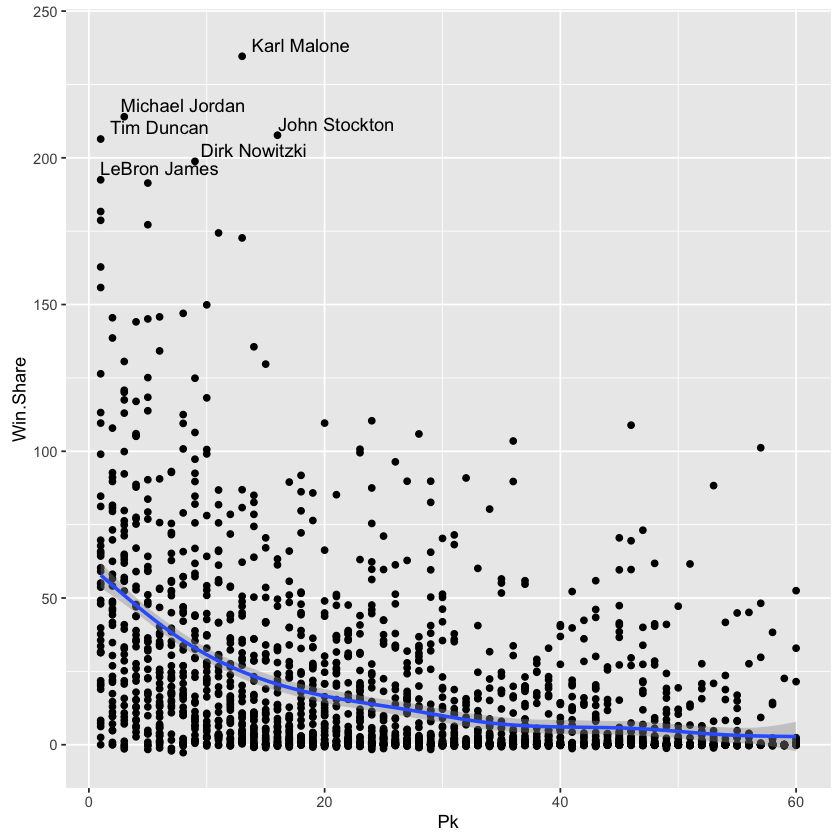

In [16]:
# 5. Plot relationships
# First, pick number to Win Share
df %>%
    filter(Pk < 61) %>%
    ggplot(aes(x = Pk, y = Win.Share))+
        geom_point()+
        geom_smooth()+
        geom_text(data=subset(df, Win.Share > 190), aes(Pk,Win.Share,label=Player), nudge_y = 4, nudge_x = 5, check_overlap = TRUE)

As one would expect and has been shown by many others, there is a high correlation between a player's draft pick and his impact in the NBA. Win share is a cumulative statistic, so it's not the best at pulling apart the relationship. Notice the decreasing parablolic relationship though, and if we choose to use Win Share in the future in any models, it will be key to account for this by using the log of the Pk (shown in the models at the bottom of the post).
We should normalize this statistic to get a better sense of the relationship, and luckily we already have a variable, win share per game, that does this.

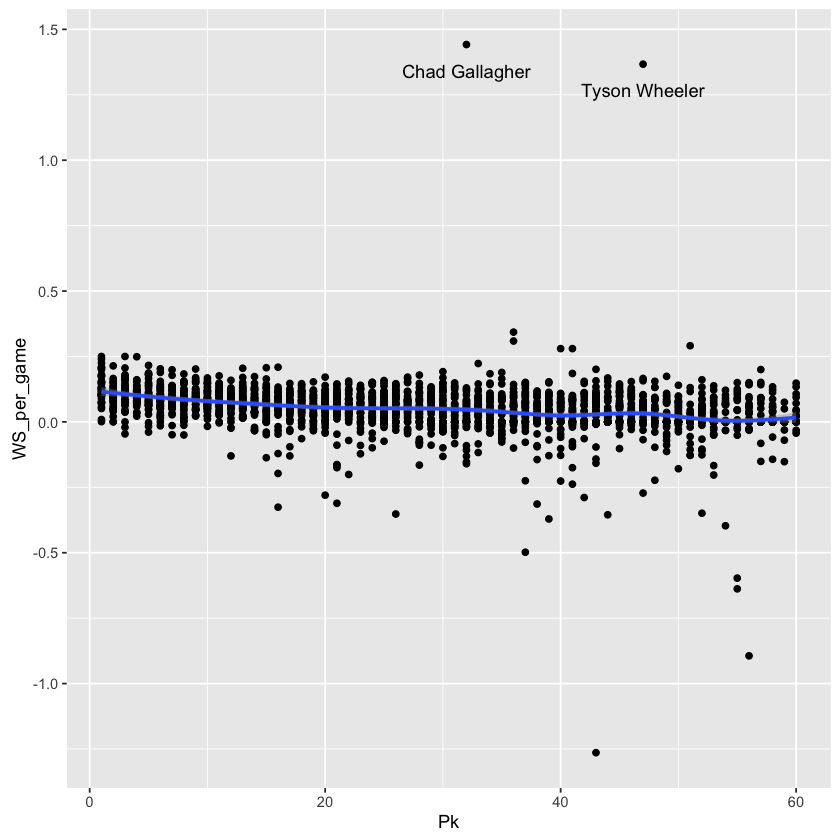

In [17]:
df %>%
    filter(Pk < 61) %>%
    ggplot(aes(x = Pk, y = WS_per_game))+
        geom_point()+
        geom_smooth()+
        geom_text(data=subset(df, WS_per_game > 1), aes(Pk,WS_per_game,label=Player), nudge_y = -0.1)

This graph does a much better job of showing the relationship between pick and player quality. It even shows two pretty absurd outliers (Gallagher & Wheeler) for picks after number 30. My instinct is that neither of these guys played very few games, especially as I don't know their names. We can check this by adding in some ggplot aesthetics to account for the number of games played (or minutes or years) 

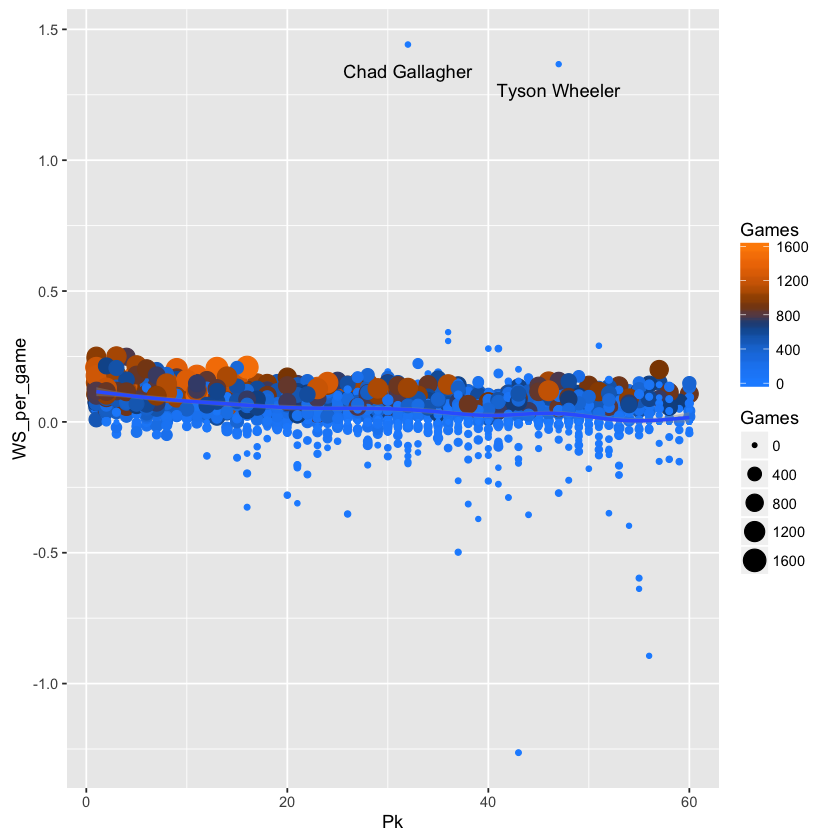

In [18]:
df %>%
    filter(Pk < 61) %>%
    ggplot(aes(x = Pk, y = WS_per_game))+
        geom_point(aes(x = Pk, y = WS_per_game, color = Games, size = Games))+
        geom_smooth()+
        geom_text(data=subset(df, WS_per_game > 1), aes(Pk,WS_per_game,label=Player), nudge_y = -0.1)+
        scale_colour_gradientn(colours=thunder)

Adding in color and size to the points to denote how much a player played shows Gallagher and Wheeler to be flukes and that they played nearly zero games. Let's look at them in the data to see who they are.

In [19]:
df[which(df$Player == "Tyson Wheeler"), ]
df[which(df$Player == "Chad Gallagher"), ]

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
Tyson Wheeler,0,0,1998,47,TOR,University of Rhode Island,1,1,3,⋯,Glen Grunwald,2324 days 00:00:00.000000000,63,2,1,0,0,0,0,0


Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
Chad Gallagher,0,0,1991,32,PHO,Creighton University,1,2,3,⋯,Jerry Colangelo,9550 days 00:00:00.000000000,76,16,1,0,0,0,0,0


Well, Gallagher clearly had the better career having played twice as many games as Wheeler and still having an absurd win share per game stat.

## Let's take a closer look at some of the best players
Given the supposed importance of pick number, let's look at some of the highest regarded players to see if there are some natural cut-offs as to when we would expect to stop seeing high quality players being picked

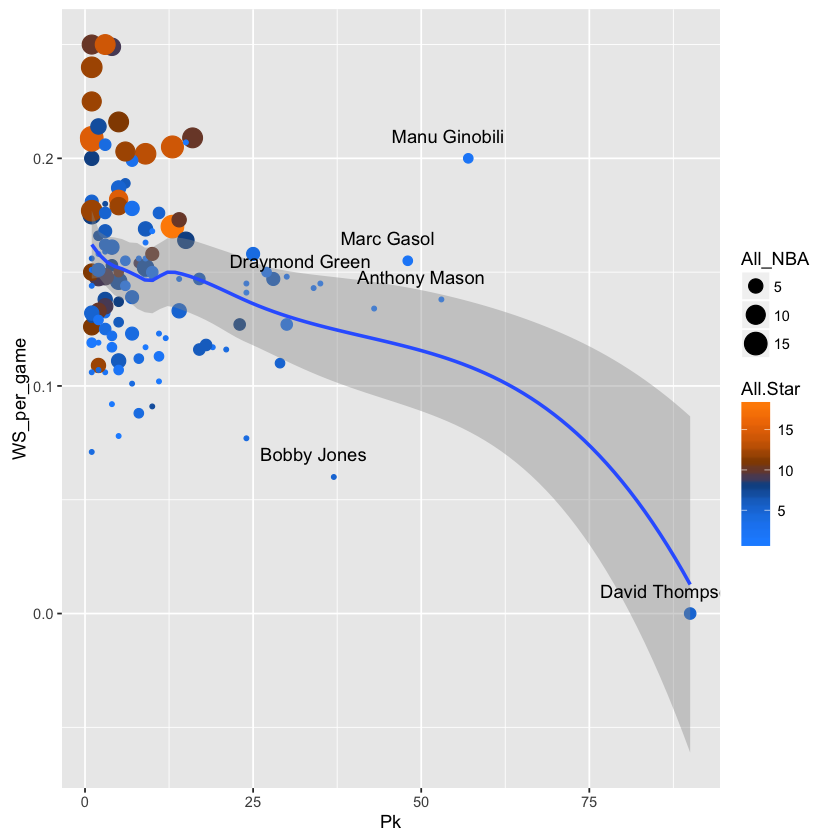

In [20]:
df %>%
    filter(All_NBA > 0 | All.Star > 0) %>%
    ggplot(aes(x = Pk, y = WS_per_game))+
        geom_point(aes(x = Pk, y = WS_per_game, color = All.Star, size = All_NBA))+
        geom_smooth()+
        geom_text(data=subset(df, Pk > 30 & (All_NBA > 0 | All.Star > 0)), aes(Pk,WS_per_game,label=Player), nudge_y = 0.01, nudge_x = -3, check_overlap = TRUE)+
        scale_colour_gradientn(colours=thunder)

The graph above does a great job of showing that the vast majority of high quality players as determined by all-NBA or all-star appearances are drafted before the 12th pick (making Kobe an even greater anomaly). Although I said this post was about analysis, I'm actually going to stop here since it's already very long and start another post looking at just the data in graphs. One last piece though, let's look at the strangeness that is David Thompson.

In [21]:
df[which(df$Player == "David Thompson"), ]

Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,⋯,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
David Thompson,3,5,1978,90,LAC,Florida State University,0,0,0,⋯,Norm Sonju,481 days 00:00:00.000000000,119,2,1,0,0,0,0,0


Looking up [David Thompson][1] reveals that this entry is an error in my previous code. The David Thompson coming out in the above graph was orginally drafted by an ABA team in 1975 that was later merged into the NBA in 1976, this is why he does not appear within my original dataframe of players drafted in the NBA from 1976 onwards. But he did play in NBA all-star games after the merger and thus he appears in my NBA accomplishment dataframe. 
Since there was a later David Thompson drafted, when merging the NBA accomplishment dataframe to the draft data, and because I couldn't control for draft year, this later David Thompson (stats shown above) was given All-star David Thompson's All NBA and All-star stats. I will adjust this accordingly in the csv's.
One of the benefits of this error was learning about David Thompson who seems to have a pretty tragic story.
[1]: https://en.wikipedia.org/wiki/David_Thompson_(basketball)#ABA.2FNBA_highlights

In [ ]:
#################### Alternative code provided by a friend for cleaning and transforming in R and some early stage models #############
#extract the numeric days of tenure
df$tenureNew <- as.numeric(stri_extract_first_regex(df$Tenure, "[0-9]+"))


#creating a years of experience column 
exec <- unique(df[c("Executive","Draft_Yr")])
exec

exec <- exec[with(exec, order(Draft_Yr)), ]
exec

yearsDrafting <- ddply(exec, .(Executive_x), mutate, years = seq_along(Draft_Yr))
df <- merge(df, yearsDrafting, by=c("Executive","Draft_Yr"))
df$yearsSquared <- df$years^2


#regression with experience 
reg <- lm(df$Win.Share ~ log(df$Pk) + df$years + df$yearsSquared )
summary(reg)

#regression with fixed effects
reg <- lm(df$Win.Share ~ log(df$Pk) + as.factor(df$Draft_Yr))
summary(reg)